In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import seaborn as sns
from mfa import MFA

# Constants

In [2]:
test_seq = 'ATGCGCGATCGATCGATCGCTAGACGTATCG'

In [3]:
list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
list[0:3]

['a', 'b', 'c']

# CGR MFA

## CGR Arbitrary epsilon range

In [4]:
m_cum = MFA.cgr('ATCG', m_size = 10 , cumulative=True)
m_cum

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [5]:
mask = m_cum != 0
non_zero = m_cum[mask]
non_zero

array([1, 1, 1, 1])

In [6]:
np.sum(m_cum)

4

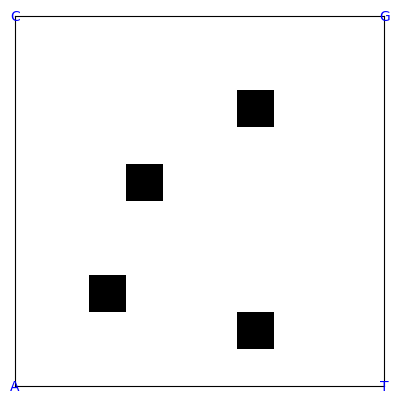

In [7]:
MFA.plot_cgr(m_cum)

In [8]:
m = MFA.cgr('ATCG', m_size = 10)
m

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

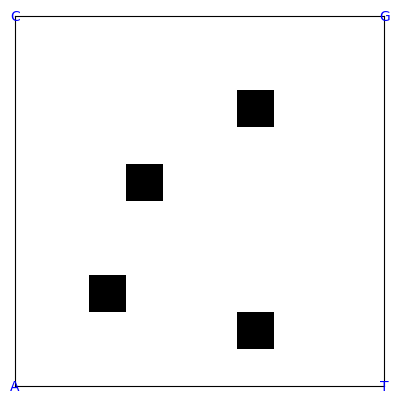

In [9]:
MFA.plot_cgr(m)

In [10]:
cgr_points = MFA.cgr_tuples('ATCG')
cgr_points

[(0.25, 0.25), (0.625, 0.125), (0.3125, 0.5625), (0.65625, 0.78125)]

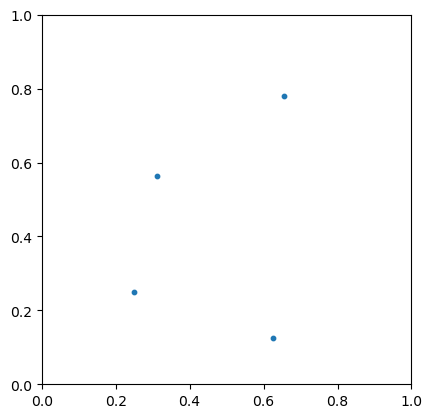

In [11]:
MFA.cgr_tuples_plot(cgr_points, 10)

In [12]:
cgr_points_1 = MFA.cgr_tuples(test_seq)
cgr_points_1

[(0.25, 0.25),
 (0.625, 0.125),
 (0.8125, 0.5625),
 (0.40625, 0.78125),
 (0.703125, 0.890625),
 (0.3515625, 0.9453125),
 (0.67578125, 0.97265625),
 (0.337890625, 0.486328125),
 (0.6689453125, 0.2431640625),
 (0.33447265625, 0.62158203125),
 (0.667236328125, 0.810791015625),
 (0.3336181640625, 0.4053955078125),
 (0.66680908203125, 0.20269775390625),
 (0.333404541015625, 0.601348876953125),
 (0.6667022705078125, 0.8006744384765625),
 (0.33335113525390625, 0.40033721923828125),
 (0.6666755676269531, 0.20016860961914062),
 (0.33333778381347656, 0.6000843048095703),
 (0.6666688919067383, 0.8000421524047852),
 (0.33333444595336914, 0.9000210762023926),
 (0.6666672229766846, 0.4500105381011963),
 (0.3333336114883423, 0.22500526905059814),
 (0.6666668057441711, 0.6125026345252991),
 (0.33333340287208557, 0.30625131726264954),
 (0.16666670143604279, 0.6531256586313248),
 (0.5833333507180214, 0.8265628293156624),
 (0.7916666753590107, 0.4132814146578312),
 (0.39583333767950535, 0.206640707328915

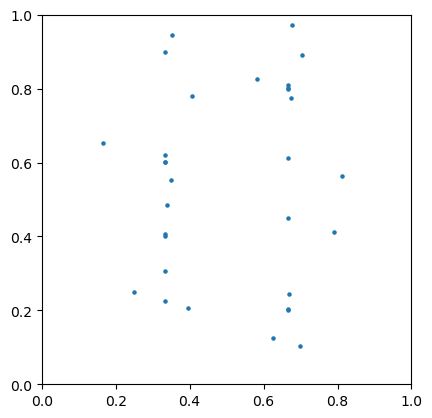

In [13]:
MFA.cgr_tuples_plot(cgr_points_1, 5)

In [14]:
cgr_points_matrix = MFA.cgr(test_seq, m_size=10)
cgr_points_matrix


array([[False, False, False,  True, False, False,  True, False, False,
        False],
       [False, False, False, False, False,  True,  True,  True, False,
        False],
       [False, False, False, False,  True, False,  True, False, False,
        False],
       [False,  True, False,  True, False, False,  True, False, False,
        False],
       [False, False, False,  True, False, False, False, False,  True,
        False],
       [False, False, False,  True, False, False,  True,  True, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False,  True,  True, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

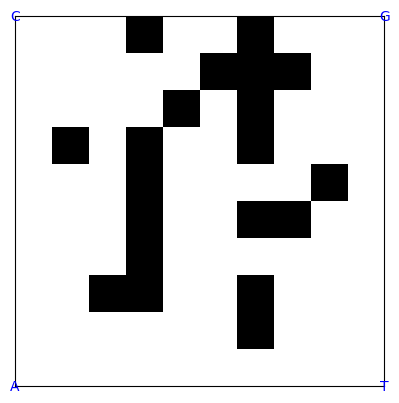

In [15]:
MFA.plot_cgr(cgr_points_matrix)

## CGR_powers
The epsilon values are a series of reciprocals of powers of two, specifically:  
 1/(2^(n)), 1/(2^(n-1)), ... , 1/16, 1/8, 1/4, 1/2.  
The method mfa_instance.cgr_next_power() computes the next CGR using the CGR with the previous epsilon (half of the current epsilon)

In [16]:
mfa_instance_0 = MFA(test_seq)

In [17]:
m_usual = MFA.cgr(test_seq, m_size=8, cumulative=True)
m_usual

array([[0, 0, 2, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 1, 4, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 1, 1, 0],
       [0, 0, 3, 0, 0, 1, 1, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0]])

In [18]:
m_powers = mfa_instance_0.cgr_powers(power = 3)
print(m_powers)
print(np.array_equal(m_powers, m_usual))

[[0 0 2 0 0 2 0 0]
 [0 0 0 1 1 4 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 4 0 0 1 1 0]
 [0 0 3 0 0 1 1 0]
 [0 0 2 0 0 0 0 0]
 [0 0 1 1 0 4 0 0]
 [0 0 0 0 0 1 0 0]]
True


In [19]:
m_usual_1 = MFA.cgr(test_seq, m_size=4, cumulative=True)
m_usual_1

array([[0, 3, 7, 0],
       [1, 4, 1, 1],
       [0, 5, 1, 1],
       [0, 2, 5, 0]])

In [20]:
next_power = mfa_instance_0.cgr_next_power()
print(next_power)
print(np.array_equal(next_power, m_usual_1))

[[0 3 7 0]
 [1 4 1 1]
 [0 5 1 1]
 [0 2 5 0]]
True


In [21]:
m_usual_2 = MFA.cgr(test_seq, m_size=2, cumulative=True)
m_usual_2

array([[8, 9],
       [7, 7]])

In [22]:
next_power = mfa_instance_0.cgr_next_power()
print(next_power)
print(np.array_equal(next_power, m_usual_2))

[[8 9]
 [7 7]]
True


In [23]:
next_power = mfa_instance_0.cgr_next_power()
next_power

array([[31]])

In [24]:
next_power = mfa_instance_0.cgr_next_power()
next_power

Matrix size is already 1


## plot_tao_q()

In [25]:
mfa_test = MFA(test_seq)

In [26]:
epsilon_range = np.linspace(0, 0.1, 11)
q_range = np.linspace(-15, 15, 11)
print(epsilon_range)
print(q_range)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
[-15. -12.  -9.  -6.  -3.   0.   3.   6.   9.  12.  15.]


/home/diegoflm/Documents/UV/courses_and_subjects/final_year_proyect/project/notebooks_and_info/MFA_code/mfa.py:214: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_tau_r2 = pd.concat([df_tau_r2, pd.DataFrame(


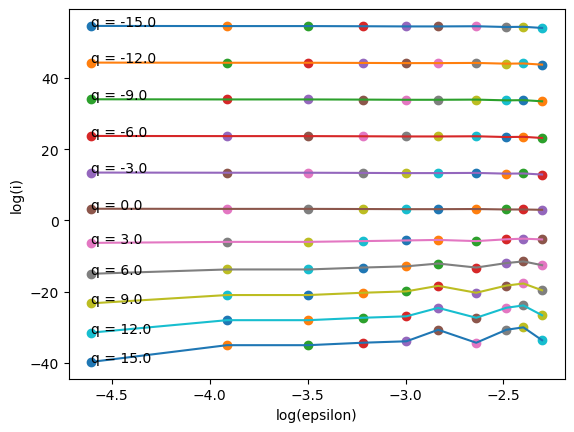

In [27]:
# tau_vals_test, r_squared_arr_test, i_list, epsilon_used = \
# df_tau_r2_test.columns = ['Q', 'Tau(Q)', 'r_squared']
df_tau_r2_test = \
    mfa_test.calc_tau_q(epsilon_range, q_range, use_powers = False, plot_log_i_log_e = True)

In [28]:
# tau_vals_test
df_tau_r2_test['Tau(Q)']


0    -0.168121
1    -0.168124
2    -0.168149
3    -0.168272
4    -0.167164
5    -0.106213
6     0.466394
7     1.247497
8     1.916010
9     2.563329
10    3.209983
Name: Tau(Q), dtype: float64

In [29]:
# r_squared_arr_test
df_tau_r2_test['r_squared']


0     0.535984
1     0.536036
2     0.536445
3     0.539711
4     0.564769
5     0.704578
6     0.825959
7     0.801469
8     0.757227
9     0.722629
10    0.697915
Name: r_squared, dtype: float64

## Caenorhabditis Elegans
Chromosome I

In [30]:
from pathlib import Path

In [31]:
PATH_DATA = Path.cwd().parent.parent / 'data'
PATH_DATA.exists()

True

In [32]:
PATH_FRAGMENT = (PATH_DATA / 'temp' / 'genomes'
                 / 'c_elegans' / 'fragment_chr1.txt')
PATH_FRAGMENT.exists()

True

In [33]:
with open(PATH_FRAGMENT, 'r') as f:
    seq_c_elegans = f.read()
len(seq_c_elegans)

506249

In [34]:
seq_c_elegans = seq_c_elegans.replace('\n', '').upper()

In [35]:
mfa_c_elegans = MFA(seq_c_elegans)

### GC Content

In [36]:
mfa_c_elegans.gc_content()

0.36145

### MFA

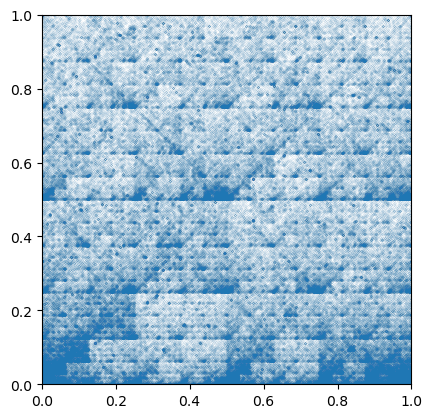

In [37]:
MFA.cgr_tuples_plot(MFA.cgr_tuples(seq_c_elegans), 0.001)

In [62]:
epsilon_range_c_elegans = np.linspace(0, 0.1, 11)
q_range_c_elegans = np.linspace(-20, 20, 64)
print(epsilon_range_c_elegans)
print(q_range_c_elegans)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
[-20.         -19.36507937 -18.73015873 -18.0952381  -17.46031746
 -16.82539683 -16.19047619 -15.55555556 -14.92063492 -14.28571429
 -13.65079365 -13.01587302 -12.38095238 -11.74603175 -11.11111111
 -10.47619048  -9.84126984  -9.20634921  -8.57142857  -7.93650794
  -7.3015873   -6.66666667  -6.03174603  -5.3968254   -4.76190476
  -4.12698413  -3.49206349  -2.85714286  -2.22222222  -1.58730159
  -0.95238095  -0.31746032   0.31746032   0.95238095   1.58730159
   2.22222222   2.85714286   3.49206349   4.12698413   4.76190476
   5.3968254    6.03174603   6.66666667   7.3015873    7.93650794
   8.57142857   9.20634921   9.84126984  10.47619048  11.11111111
  11.74603175  12.38095238  13.01587302  13.65079365  14.28571429
  14.92063492  15.55555556  16.19047619  16.82539683  17.46031746
  18.0952381   18.73015873  19.36507937  20.        ]


In [63]:
# tau_vals_c_elegans, r_squared_arr_c_elegans, i_list_c_elegans, epsilon_used_c_elegans = \
#     mfa_c_elegans.calc_tau_q(epsilon_range_c_elegans, q_range_c_elegans, use_powers = False, plot_log_i_log_e = True)

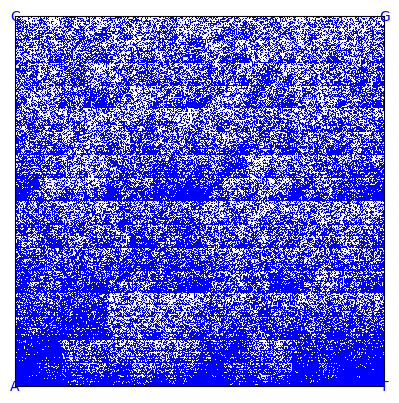

/home/diegoflm/Documents/UV/courses_and_subjects/final_year_proyect/project/notebooks_and_info/MFA_code/mfa.py:214: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_tau_r2 = pd.concat([df_tau_r2, pd.DataFrame(


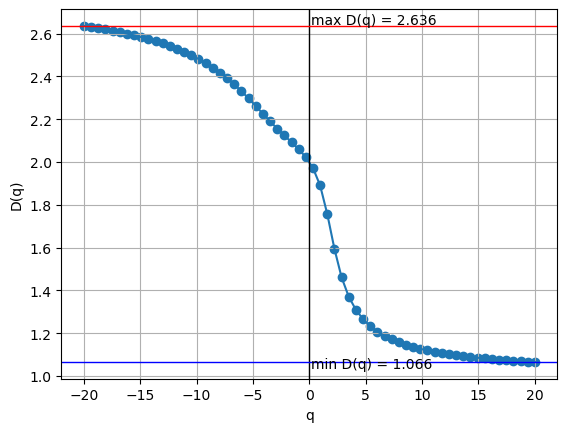

In [64]:
# D_q_vals_c_elegans, r_squared_vals_c_elegans = mfa_c_elegans.calc_Dq(
#     epsilon_range_c_elegans, q_range_c_elegans, plot_log_i_log_e = True, 
#     use_powers = False)
df_DQ_c_elegans = mfa_c_elegans.calc_Dq(
    epsilon_range_c_elegans, q_range_c_elegans, plot_gds = True, 
    plot_log_i_log_e = False, plot_cgr = True, use_powers = False)

In [65]:
# D_q_vals_c_elegans

In [66]:
# r_squared_vals_c_elegans

In [67]:
# delta_Dq_c_elegans = np.max(D_q_vals_c_elegans) - np.min(D_q_vals_c_elegans)
# delta_Dq_c_elegans

## Human Globin

In [68]:
PATH_H_GLOBIN = (PATH_DATA / 'temp' / 'genomes'
                 / 'human_globin' / 'human_globin.txt')
PATH_H_GLOBIN.exists() 

True

In [69]:
with open(PATH_H_GLOBIN, 'r') as f:
    seq_h_globin = f.read()

In [70]:
len(seq_h_globin.split('\n')[0])

51

In [71]:
seq_h_globin = seq_h_globin[52:].replace('\n', '').upper()
seq_h_globin[:100]

'GAATTCTAATCTCCCTCTCAACCCTACAGTCACCCATTTGGTATATTAAAGATGTGTTGTCTACTGTCTAGTATCCCTCAAGTAGTGTCAGGAATTAGTC'

In [72]:
len(seq_h_globin)

73308

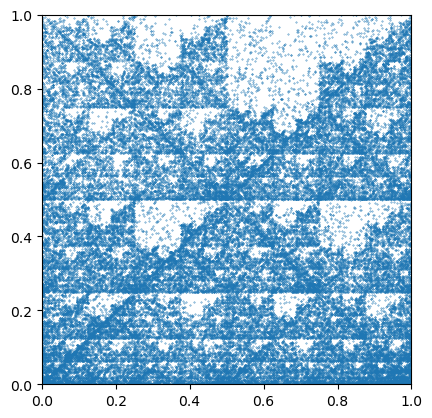

In [73]:
MFA.cgr_tuples_plot(MFA.cgr_tuples(seq_h_globin), 0.1)

epsilon desde 1/4 hasta 1/512  
q en [-20, 20]  
https://www.nature.com/articles/20924  



### matrix cgr

2000128
[[ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 5  7  9 ...  6  2  5]
 [ 9  6  5 ...  3  8  8]
 [45 12  6 ...  4  8 62]]


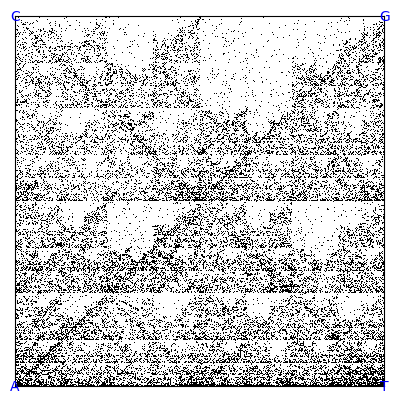

In [74]:
matrix_h_globin_cum = MFA.cgr(seq_h_globin, m_size = 500, cumulative = True)
print(sys.getsizeof(matrix_h_globin_cum))
print(matrix_h_globin_cum)

MFA.plot_cgr(matrix_h_globin_cum)

In [75]:
mfa_globin = MFA(seq_h_globin)

In [76]:
epsilon_range_globin = np.linspace(0, 0.1, 15)
q_range_globin = np.linspace(-30, 30, 30)
print(epsilon_range_globin)
print(q_range_globin)

[0.         0.00714286 0.01428571 0.02142857 0.02857143 0.03571429
 0.04285714 0.05       0.05714286 0.06428571 0.07142857 0.07857143
 0.08571429 0.09285714 0.1       ]
[-30.         -27.93103448 -25.86206897 -23.79310345 -21.72413793
 -19.65517241 -17.5862069  -15.51724138 -13.44827586 -11.37931034
  -9.31034483  -7.24137931  -5.17241379  -3.10344828  -1.03448276
   1.03448276   3.10344828   5.17241379   7.24137931   9.31034483
  11.37931034  13.44827586  15.51724138  17.5862069   19.65517241
  21.72413793  23.79310345  25.86206897  27.93103448  30.        ]


In [77]:
np.round(1 / epsilon_range_globin[1:])

array([140.,  70.,  47.,  35.,  28.,  23.,  20.,  18.,  16.,  14.,  13.,
        12.,  11.,  10.])

/home/diegoflm/Documents/UV/courses_and_subjects/final_year_proyect/project/notebooks_and_info/MFA_code/mfa.py:214: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_tau_r2 = pd.concat([df_tau_r2, pd.DataFrame(


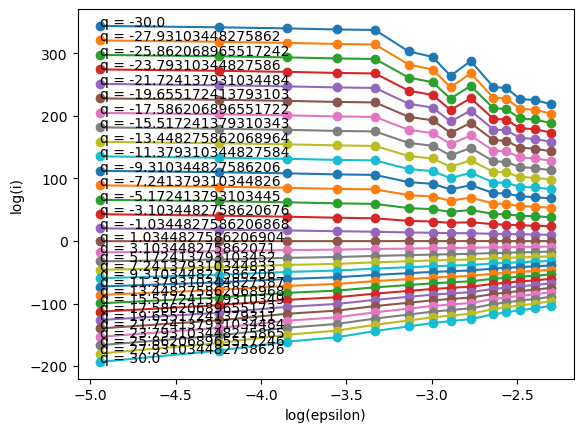

tau_vals
0    -0.168121
1    -0.168124
2    -0.168149
3    -0.168272
4    -0.167164
5    -0.106213
6     0.466394
7     1.247497
8     1.916010
9     2.563329
10    3.209983
Name: Tau(Q), dtype: float64


In [78]:
# tau_vals, r_squared_arr, i_list_globin, epsilon_used_globin = \
# df_tau_r2_test.columns = ['Q', 'Tau(Q)', 'r_squared']
df_tau_r2_globin = mfa_globin.calc_tau_q(epsilon_range_globin, 
                                         q_range_globin, 
                                         use_powers = False, 
                                         plot_log_i_log_e = True)
print("tau_vals")
print(df_tau_r2_test['Tau(Q)'])

In [79]:
# r_squared_arr
df_tau_r2_test['r_squared']

0     0.535984
1     0.536036
2     0.536445
3     0.539711
4     0.564769
5     0.704578
6     0.825959
7     0.801469
8     0.757227
9     0.722629
10    0.697915
Name: r_squared, dtype: float64

In [80]:
df_tau_r2_globin['Tau(Q)']

0    -55.169456
1    -51.577421
2    -47.984874
3    -44.391683
4    -40.797645
5    -37.202429
6    -33.605480
7    -30.005814
8    -26.401633
9    -22.789562
10   -19.163182
11   -15.510505
12   -11.811058
13    -8.035273
14    -4.044275
15     0.064744
16     3.587972
17     6.100904
18     8.418571
19    10.786664
20    13.179069
21    15.581370
22    17.988614
23    20.398954
24    22.811557
25    25.225940
26    27.641764
27    30.058761
28    32.476712
29    34.895430
Name: Tau(Q), dtype: float64

In [81]:
# Define a threshold to avoid division by values too close to zero
threshold = 1e-6

# Find indices where q - 1 is not too close to zero
valid_indices = np.where(np.abs(q_range_globin - 1) > threshold)

# Extract the actual indices array from the tuple
valid_indices = valid_indices[0]

# Use valid_indices to index tau_vals and q_range_globin
D_q_vals = df_tau_r2_globin['Tau(Q)'][valid_indices] / (q_range_globin[valid_indices] - 1)
D_q_vals


0     1.779660
1     1.782771
2     1.786343
3     1.790485
4     1.795344
5     1.801119
6     1.808087
7     1.816636
8     1.827321
9     1.840940
10    1.858636
11    1.882028
12    1.913523
13    1.958176
14    1.987864
15    1.877569
16    1.705757
17    1.462200
18    1.348832
19    1.297980
20    1.269744
21    1.251689
22    1.239121
23    1.229875
24    1.222801
25    1.217225
26    1.212725
27    1.209021
28    1.205921
29    1.203291
Name: Tau(Q), dtype: float64

In [82]:
# D_q_vals, r_squared_vals = mfa_globin.calc_Dq(
# df_DQ.columns == ['Q', 'Tau(Q)', 'D(Q)', 'r_squared']
# df_DQ_globin = mfa_globin.calc_Dq(
#     epsilon_range_globin, q_range_globin, plot_log_i_log_e = False,
#     use_powers = False)
# Before correction:

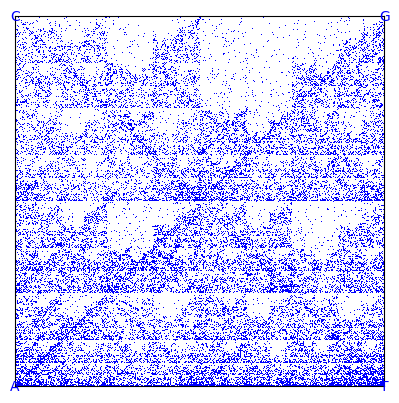

/home/diegoflm/Documents/UV/courses_and_subjects/final_year_proyect/project/notebooks_and_info/MFA_code/mfa.py:214: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_tau_r2 = pd.concat([df_tau_r2, pd.DataFrame(


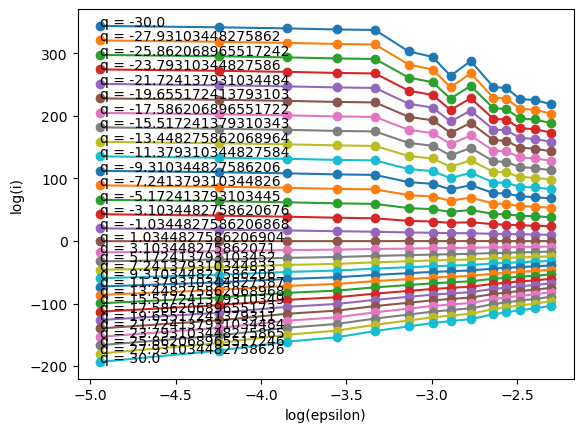

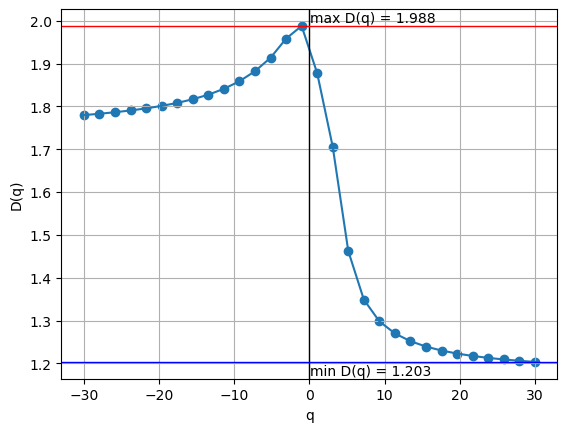

In [83]:
# D_q_vals, r_squared_vals = mfa_globin.calc_Dq(
# df_DQ.columns == ['Q', 'Tau(Q)', 'D(Q)', 'r_squared']
df_DQ_globin = mfa_globin.calc_Dq(
    epsilon_range_globin, q_range_globin, plot_gds = True, 
    plot_log_i_log_e = True, plot_cgr=True, use_powers = False)

In [84]:
df_DQ_globin['D(Q)']

0     1.779660
1     1.782771
2     1.786343
3     1.790485
4     1.795344
5     1.801119
6     1.808087
7     1.816636
8     1.827321
9     1.840940
10    1.858636
11    1.882028
12    1.913523
13    1.958176
14    1.987864
15    1.877569
16    1.705757
17    1.462200
18    1.348832
19    1.297980
20    1.269744
21    1.251689
22    1.239121
23    1.229875
24    1.222801
25    1.217225
26    1.212725
27    1.209021
28    1.205921
29    1.203291
Name: D(Q), dtype: float64

In [85]:
print(np.max(D_q_vals))
print(np.min(D_q_vals))
delta_Dq = np.max(D_q_vals) - np.min(D_q_vals)
print(delta_Dq)

1.9878638584262063
1.2032906783865844
0.7845731800396218
